<a href="https://colab.research.google.com/github/vedpawar03/Codsoft/blob/main/irisflower_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('/content/irisdataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#lets have statistical as well as basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#lets see how is the data distributed
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [13]:
data['species']=data['species'].replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})


<Axes: xlabel='species', ylabel='sepal_width'>

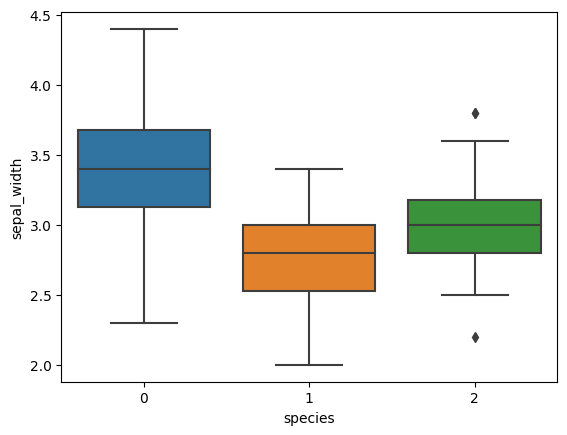

In [34]:
#lets find outliers and eliminate them
sns.boxplot(data=data,x='species',y='sepal_width')

In [35]:
data[(data["species"]==2) & (data['sepal_width']<2.5)]


,sepal_length,sepal_width,petal_length,petal_width,species
119,6.0,2.2,5.0,1.5,2


In [36]:
data.drop(index=[119],inplace=True)

<Axes: xlabel='species', ylabel='sepal_width'>

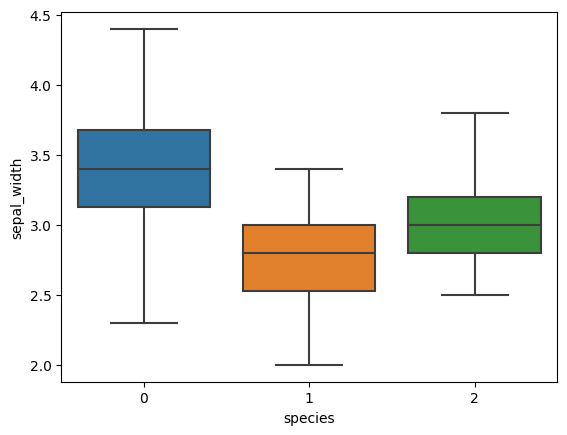

In [37]:
sns.boxplot(data=data,x='species',y='sepal_width')

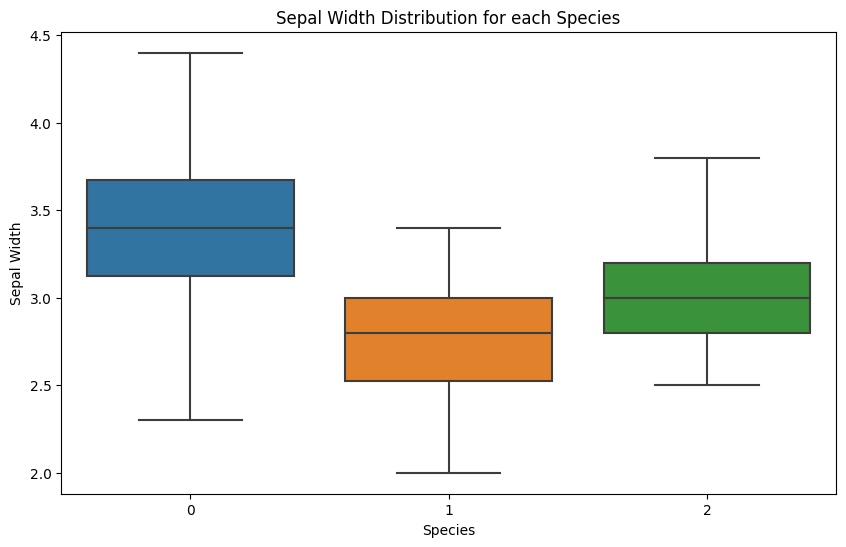

In [38]:
#lets see distribution in terms of visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_width', data=data)
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.title('Sepal Width Distribution for each Species')
plt.show()

In [42]:
#lets start building our model

In [46]:
#spliting our data into training and testing
x=data.iloc[:,:-1]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
y=data['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 149, dtype: int64

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [49]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model

In [50]:
dt=DecisionTreeClassifier()
mymodel(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



DecisionTreeClassifier()

In [54]:
#as you can see our model is getting overfitted on train data we will reduce impurity
dt.score(xtrain,ytrain)

1.0

In [52]:
dt.score(xtest,ytest)

0.9666666666666667

In [53]:
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}= {accuracy_score(ytest,ypred)}")

1= 0.5666666666666667
2= 0.9666666666666667
3= 0.9666666666666667
4= 0.9666666666666667
5= 0.9666666666666667
6= 0.9666666666666667
7= 0.9666666666666667
8= 0.9666666666666667
9= 0.9666666666666667
10= 0.9666666666666667
11= 0.9666666666666667
12= 0.9666666666666667
13= 0.9666666666666667
14= 0.9666666666666667
15= 0.9666666666666667
16= 0.9666666666666667
17= 0.9666666666666667
18= 0.9666666666666667
19= 0.9666666666666667
20= 0.9666666666666667
21= 0.9666666666666667
22= 0.9666666666666667
23= 0.9666666666666667
24= 0.9666666666666667
25= 0.9666666666666667
26= 0.9666666666666667
27= 0.9666666666666667
28= 0.9666666666666667
29= 0.9666666666666667
30= 0.9666666666666667
31= 0.9666666666666667
32= 0.9666666666666667
33= 0.9666666666666667
34= 0.9666666666666667
35= 0.9666666666666667
36= 0.9666666666666667
37= 0.9666666666666667
38= 0.9666666666666667
39= 0.9666666666666667
40= 0.9666666666666667
41= 0.9666666666666667
42= 0.9666666666666667
43= 0.9666666666666667
44= 0.96666666666666

In [55]:
#best value of max_depth=10
dt3=DecisionTreeClassifier(max_depth=25)
mymodel(dt3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



DecisionTreeClassifier(max_depth=25)

In [56]:
for i in range(1,75):

    dt4=DecisionTreeClassifier(min_samples_leaf=i)
    dt4.fit(xtrain,ytrain)
    ypred=dt4.predict(xtest)
    print(f"{i}= {accuracy_score(ytest,ypred)}")

1= 0.9666666666666667
2= 0.9666666666666667
3= 0.9666666666666667
4= 0.9666666666666667
5= 0.9666666666666667
6= 0.9666666666666667
7= 0.9666666666666667
8= 0.9666666666666667
9= 0.9666666666666667
10= 0.9666666666666667
11= 0.9666666666666667
12= 0.9666666666666667
13= 0.9666666666666667
14= 0.9666666666666667
15= 0.9666666666666667
16= 0.9666666666666667
17= 0.9666666666666667
18= 0.9666666666666667
19= 0.9666666666666667
20= 0.9666666666666667
21= 0.9666666666666667
22= 0.9666666666666667
23= 0.9666666666666667
24= 0.9666666666666667
25= 0.9666666666666667
26= 0.9666666666666667
27= 0.9666666666666667
28= 0.9666666666666667
29= 0.9666666666666667
30= 0.9666666666666667
31= 0.9666666666666667
32= 0.9666666666666667
33= 0.9666666666666667
34= 0.9666666666666667
35= 0.9666666666666667
36= 0.9666666666666667
37= 0.9666666666666667
38= 0.9666666666666667
39= 0.9666666666666667
40= 0.5666666666666667
41= 0.5666666666666667
42= 0.5666666666666667
43= 0.5666666666666667
44= 0.56666666666666

In [57]:
dt5=DecisionTreeClassifier(min_samples_leaf=15)
mymodel(dt5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



DecisionTreeClassifier(min_samples_leaf=15)

In [58]:
#gini
dt6=DecisionTreeClassifier(max_depth=25,min_samples_leaf=15)
mymodel(dt6)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



DecisionTreeClassifier(max_depth=25, min_samples_leaf=15)

In [59]:
#lets build out final model now
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=15,max_depth=25)
mymodel(dt7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=15)

In [63]:
#as you can see our model is not overfitting ontraining data
dt7.score(xtrain,ytrain)

0.9663865546218487

In [64]:
dt7.score(xtest,ytest)

0.9666666666666667

In [66]:
ypred = dt7.predict(xtest)
ypred

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2,
       0, 2, 2, 0, 1, 0, 1, 2])

In [67]:
# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [69]:
# Display the classification report and confusion matrix
print("Classification Report:")
print(classification_report(ytest, ypred))

print("Confusion Matrix:")
print(confusion_matrix(ytest, ypred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


In [77]:
#lets create user define module for predicting new predictions
new=([[5.1,3.3,1.4,0.8]])
prediction=dt7.predict(new)
print(prediction)

[0]


In [78]:

new=([[5.1,3.3,3.5,4.8]])
prediction=dt7.predict(new)
print(prediction)

[2]
